### Import the required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings('ignore')

### Read the Data

In [2]:
train = pd.read_csv('Train.csv')

In [3]:
test = pd.read_csv('Test.csv')

In [4]:
df = pd.concat([train,test],axis=0,ignore_index=True)

In [5]:
df.shape

(30000, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Uniq Id                     30000 non-null  object 
 1   Package Name                30000 non-null  object 
 2   Package Type                30000 non-null  object 
 3   Destination                 30000 non-null  object 
 4   Itinerary                   30000 non-null  object 
 5   Places Covered              30000 non-null  object 
 6   Travel Date                 30000 non-null  object 
 7   Hotel Details               30000 non-null  object 
 8   Start City                  30000 non-null  object 
 9   Airline                     30000 non-null  object 
 10  Flight Stops                30000 non-null  int64  
 11  Meals                       30000 non-null  int64  
 12  Sightseeing Places Covered  30000 non-null  object 
 13  Cancellation Rules          300

In [7]:
df.isna().sum()

Uniq Id                          0
Package Name                     0
Package Type                     0
Destination                      0
Itinerary                        0
Places Covered                   0
Travel Date                      0
Hotel Details                    0
Start City                       0
Airline                          0
Flight Stops                     0
Meals                            0
Sightseeing Places Covered       0
Cancellation Rules               0
Per Person Price              9000
dtype: int64

### Feature Engineering

In [8]:
df.head()

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,30-07-2021,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0
1,178f892630ce3e335a5a41d5d83937fd,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,08-12-2021,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5
2,f060f2954840503cc2fdaf495357b7df,Might of Mewar- Udaipur and Chittorgarh,Luxury,Udaipur|Chittorgarh,2N Udaipur . 1N Chittorgarh,Udaipur|Chittorgarh,26-04-2021,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,New Delhi,IndiGo,0,4,Lake Pichola | Jag Mandir Palace | Saheliyon ...,Cancellation any time after making the 1st pay...,12421.5
3,32a19a6c171e67448f2346da46c619dc,Colorful Kerala ( Romantic Getaway ),Premium,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...,Munnar|Kumarakom|Allepey|Kovalam and Poovar,27-08-2021,Elixir Hills Suites Resort & Spa-MMT Holidays ...,New Delhi,IndiGo,0,5,Mattupetty Dam | Echo Point | Tata Tea Museum...,Cancellation any time after making the 1st pay...,35967.0
4,107b068aa0ca03bc6248966f594d105f,A Week In Bangkok & Pattaya,Premium,Pattaya|Bangkok,4N Pattaya . 3N Bangkok,Pattaya|Bangkok,12-12-2021,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,New Delhi,Spicejet|Go Air,0,5,"Coral Island Tour with Indian Lunch, Join Spe...",Cancellation any time after making the 1st pay...,25584.0


In [9]:
df.drop(['Uniq Id','Package Name','Destination'],axis=1,inplace=True)

### Package Type

In [10]:
df['Package Type'].value_counts()

Package Type
Deluxe      8499
Standard    8171
Premium     7960
Luxury      4688
Budget       682
Name: count, dtype: int64

In [11]:
df.groupby('Package Type')['Per Person Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Package Type,,,,,,,,
Budget,466.0,14151.447425,8236.467588,1757.0,8901.250,13114.25,17927.00,64008.5
Deluxe,6006.0,18409.508825,10228.326587,1198.0,12119.000,16426.75,22774.25,171062.5
Luxury,3278.0,23679.556437,11958.923869,2963.0,15471.625,22222.50,29170.75,107850.0
Premium,5581.0,23965.407006,13272.618593,2967.0,15232.000,21767.50,29188.00,170763.0
Standard,5669.0,16354.089081,9363.498521,791.0,10563.500,14729.50,19972.00,153795.0


In [12]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(categories=[['Budget','Standard','Deluxe','Luxury','Premium']])
df['Package Type'] = oe.fit_transform(df[['Package Type']])

### Itinerary

In [13]:
df['Itinerary'][0]

'1N New Delhi . 2N Shimla . 2N Manali . 1N Chandigarh'

In [14]:
import re

data = '1N New Delhi . 2N Shimla . 2N Manali . 1N Chandigarh'

np.sum(pd.to_numeric(re.findall("\d", data)))

6

In [15]:
df['Duration'] = df['Itinerary'].apply(lambda x: np.sum(pd.to_numeric(re.findall('\d', x))))

In [16]:
df.drop('Itinerary',axis=1,inplace=True)

### Places Covered

In [17]:
len(df['Places Covered'][0].split('|'))

4

In [18]:
df['Places Covered'] = df['Places Covered'].map(lambda x: len(x.split('|')))

### Travel Date

In [19]:
df['Travel Date'].value_counts()

Travel Date
23-06-2021    103
22-06-2021    103
01-07-2021    102
24-06-2021    102
04-07-2021    101
             ... 
09-01-2021      1
02-01-2021      1
01-01-2021      1
15-05-2022      1
07-01-2021      1
Name: count, Length: 503, dtype: int64

In [20]:
df['Travel Date'] = pd.to_datetime(df['Travel Date'])

df['Date'] = df['Travel Date'].dt.day
df['Month'] = df['Travel Date'].dt.month
df['Year'] = df['Travel Date'].dt.year

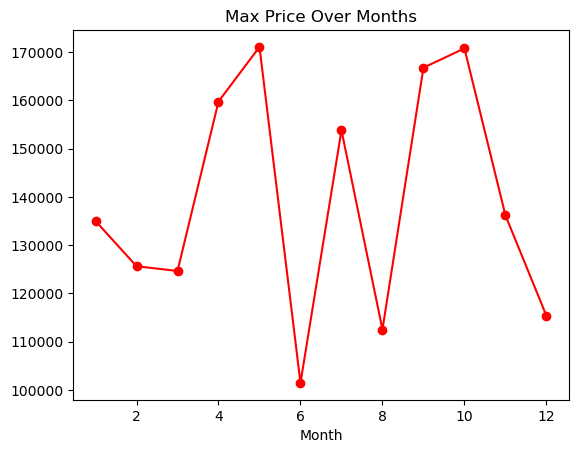

In [21]:
# Extract the Pattern with the Target variable

df.groupby('Month')['Per Person Price'].max().plot(kind='line', marker='o', color='red')
plt.title("Max Price Over Months")
plt.show()

In [22]:
def peak_month(x):
    if x in [4, 5, 7, 9, 10]:
        return 1
    else:
        return 0

In [23]:
df['Peak_Months'] = df['Month'].apply(peak_month)

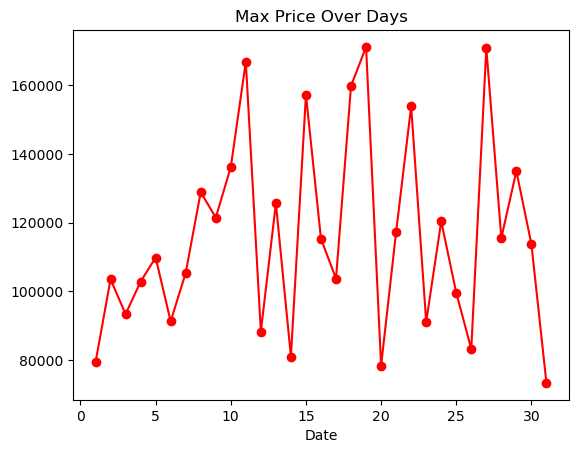

In [24]:
df.groupby('Date')['Per Person Price'].max().plot(kind='line',marker='o',color='red')
plt.title("Max Price Over Days")
plt.show()

In [25]:
def peak_days(x):
    if x in [2, 4, 5, 7, 8, 10, 11, 13, 15, 18, 19, 21, 22, 24, 27, 29]:
        return 1
    else:
        return 0

In [26]:
df['Peak_Days'] = df['Date'].apply(peak_days)

In [27]:
df.drop(['Travel Date','Date','Month'],axis=1,inplace=True)

In [28]:
df.Year.value_counts()

Year
2021    28807
2022     1193
Name: count, dtype: int64

In [29]:
df['Year'] = df['Year'].map({2021:'Year 2021',2022:'Year 2022'})

In [30]:
df = pd.concat([df,pd.get_dummies(df['Year'],dtype='int')],axis=1)
df.drop('Year',axis=1,inplace=True)

### Hotel Details

In [31]:
df['Hotel Details'][3]

'Elixir Hills Suites Resort & Spa-MMT Holidays Special:4.6|The Zuri Kumarakom, Kerala Resort & Spa:4.6|Marari Beach - CGH Earth:4.3|Estuary Sarovar Portico:'

In [32]:
# Extract Ratings

text = 'Elixir Hills Suites Resort & Spa-MMT Holidays Special:4.6|The Zuri Kumarakom, Kerala Resort & Spa:4.6|Marari Beach - CGH Earth:4.3|Estuary Sarovar Portico:'

np.mean(pd.to_numeric(re.findall('\d\.\d', text)))

4.5

In [33]:
df['Hotel Details'] = df['Hotel Details'].apply(lambda x: round(np.mean(pd.to_numeric(re.findall('\d\.\d',x))),1))

In [34]:
df['Hotel Details'].isna().sum()

8864

In [35]:
df['Hotel Details'].fillna(0,inplace=True)

In [36]:
df['Hotel Details'] = df['Hotel Details'].astype('int')

In [37]:
df['Hotel Details'].value_counts()

Hotel Details
4    15169
0     8864
3     5819
2       98
5       39
1       11
Name: count, dtype: int64

In [38]:
df['Hotel Details'] = df['Hotel Details'].map({0:'No Rating',1:'Rating One',2:'Rating Two',3:'Rating Three',4:'Rating Four',5:'Rating Five'})

In [39]:
df = pd.concat([df,pd.get_dummies(df['Hotel Details'],dtype='int')],axis=1)
df.drop('Hotel Details',axis=1,inplace=True)

### Start City

In [40]:
df['Start City'].value_counts()

Start City
New Delhi    19664
Mumbai       10336
Name: count, dtype: int64

In [41]:
df = pd.concat([df,pd.get_dummies(df['Start City'],dtype='int')],axis=1)
df.drop('Start City',axis=1,inplace=True)

### Airline

In [42]:
df['Airline'].value_counts()

Airline
Not Available                                                                 7010
IndiGo                                                                        5292
Spicejet                                                                      4378
Go Air                                                                        3033
IndiGo|IndiGo                                                                 1584
                                                                              ... 
Cathay Pacific|Cathay Pacific|Qantas Airways|Cathay Pacific|Cathay Pacific       1
IndiGo|Garuda Indonesia|Garuda Indonesia|Malindo Air|Malindo Air                 1
Air India|AirAsia Indonesia|AirAsia Indonesia|AirAsia X                          1
Malindo Air|AirAsia X                                                            1
Malindo Air|Malindo Air|AirAsia Indonesia|Thai Airways|Thai Airways              1
Name: count, Length: 363, dtype: int64

In [43]:
df['Count_Flights'] = df['Airline'].map(lambda x: len(x.split('|')))

In [44]:
df.drop('Airline',axis=1,inplace=True)

### Sightseeing Places Covered

In [45]:
df['Sightseeing Places Covered']

0                                            Not Available
1         Dal Lake | Avantipura Ruins | Mughal Gardens ...
2         Lake Pichola | Jag Mandir Palace | Saheliyon ...
3         Mattupetty Dam | Echo Point | Tata Tea Museum...
4         Coral Island Tour with Indian Lunch, Join Spe...
                               ...                        
29995     Valara Waterfalls | Tea Plantation at Devikul...
29996     Dal Lake | Pahalgam | Avantipura Ruins | Beta...
29997     Dalai Lama temple | Bhagsu falls | Church of ...
29998     City Palace | Hawa Mahal | Jantar Mantar | Ra...
29999                                        Not Available
Name: Sightseeing Places Covered, Length: 30000, dtype: object

In [46]:
df['Count_Sightseeing'] = df['Sightseeing Places Covered'].map(lambda x: len(x.split('|')))

In [47]:
df.drop('Sightseeing Places Covered',axis=1,inplace=True)

### Cancellation Rules

In [48]:
np.sum(df['Cancellation Rules']=='Not Available')

1142

In [49]:
def Cancellation_Rules(a):
    if a == 'Not Available':
        return 1
    else:
        return 0

In [50]:
df['Cancellation Rules'] = df['Cancellation Rules'].apply(Cancellation_Rules)

### Price Per Person - Target Variable

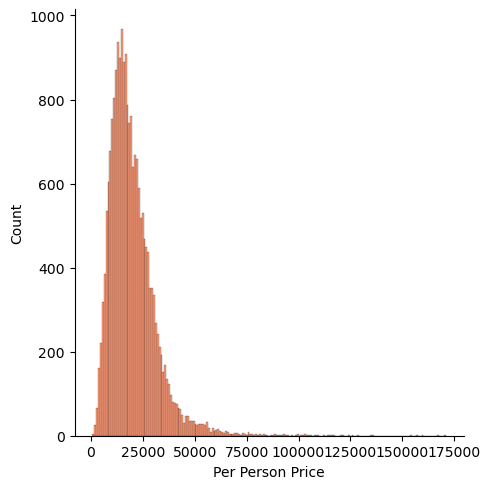

In [51]:
sns.displot(df['Per Person Price'], color='coral')
plt.show()

### Splitting Back the Data

In [52]:
train = df[~df['Per Person Price'].isna()]

In [53]:
test = df[df['Per Person Price'].isna()]

In [54]:
test.drop('Per Person Price',axis=1,inplace=True)

In [55]:
xtrain = train.drop('Per Person Price',axis=1)
ytrain = train['Per Person Price']
xtest = test

### Scaling the Data

In [56]:
num = ['Package Type', 'Places Covered', 'Flight Stops', 'Meals', 'Duration', 'Count_Flights', 'Count_Sightseeing']

In [57]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
scaled_xtrain = pd.DataFrame(ss.fit_transform(xtrain[num]),columns=num)
scaled_xtest = pd.DataFrame(ss.transform(xtest[num]),columns=num)

In [58]:
xtest.reset_index(drop=True,inplace=True)

In [59]:
xtrain = pd.concat([xtrain.drop(num,axis=1),scaled_xtrain],axis=1)
xtest = pd.concat([xtest.drop(num,axis=1),scaled_xtest],axis=1)

### Dropping High Variance Factor

In [60]:
vif_df = xtrain[['Places Covered', 'Flight Stops', 'Meals', 'Duration', 'Count_Flights', 'Count_Sightseeing']]

In [61]:
vif_df.corr()

,Places Covered,Flight Stops,Meals,Duration,Count_Flights,Count_Sightseeing
Places Covered,1.000000,0.005875,0.015110,0.757535,0.077882,0.432198
Flight Stops,0.005875,1.000000,-0.835629,-0.008713,0.070780,-0.021154
Meals,0.015110,-0.835629,1.000000,0.022615,-0.065458,0.026746
Duration,0.757535,-0.008713,0.022615,1.000000,0.155989,0.367422
Count_Flights,0.077882,0.070780,-0.065458,0.155989,1.000000,-0.169605
Count_Sightseeing,0.432198,-0.021154,0.026746,0.367422,-0.169605,1.000000


In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = []
for i in range(len(vif_df.columns)):
    vif.append(variance_inflation_factor(vif_df.values,i))
pd.DataFrame(vif,index=vif_df.columns).sort_values(by=0)

,0
Count_Flights,1.097230
Count_Sightseeing,1.310631
Duration,2.429215
Places Covered,2.510516
Meals,3.319440
Flight Stops,3.321310


In [63]:
xtrain.drop('Package Type',axis=1,inplace=True)
xtest.drop('Package Type',axis=1,inplace=True)

## Random Forest Model

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=10)
params = {'max_depth':[11,12,13,15]}

gs = GridSearchCV(rf,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-1,cv=3)
gs.fit(xtrain,ytrain)
gs.best_estimator_

RandomForestRegressor(max_depth=13, random_state=10)

In [65]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=13,oob_score=True)
rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)

In [66]:
solution = pd.DataFrame(ypred,columns=['Per Person Price'])

In [67]:
solution.to_csv('submission.csv',index=False)